# História das Olimpíadas - Parte 2

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

## Leonardo Estrazulas Dolzan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

athlete_events_raw = pd.read_csv('./datasets/athlete_events.csv', index_col =None)
athlete_events = pd.read_csv('./datasets/athlete_events.csv', index_col =None)


athlete_events.NOC.unique()
athlete_events.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [2]:
athlete_events[athlete_events["NOC"] =="BRA"]
bra_athl = athlete_events[athlete_events["NOC"] =="BRA"]
bra_athl.head(5)
bra_athl[bra_athl["Medal"].notnull()]
bra_medals = bra_athl[bra_athl["Medal"].notnull()]

bra_medals.head(5)

ID                                 Name Sex   Age  Height  Weight  \
1651   918                  Ademir Roque Kaefer   M  24.0   179.0    74.0   
1652   918                  Ademir Roque Kaefer   M  28.0   179.0    74.0   
1668   925  Adenzia Aparecida Ferreira da Silva   F  25.0   187.0    65.0   
1733   966                         Daniel Adler   M  26.0   180.0    72.0   
1856  1020         Adriana Aparecida dos Santos   F  25.0   180.0    61.0   

        Team  NOC        Games  Year  Season         City       Sport  \
1651  Brazil  BRA  1984 Summer  1984  Summer  Los Angeles    Football   
1652  Brazil  BRA  1988 Summer  1988  Summer        Seoul    Football   
1668  Brazil  BRA  2012 Summer  2012  Summer       London  Volleyball   
1733  Brazil  BRA  1984 Summer  1984  Summer  Los Angeles     Sailing   
1856  Brazil  BRA  1996 Summer  1996  Summer      Atlanta  Basketball   

                                    Event   Medal  
1651              Football Men's Football  Silver  
1652              Football Men's Football  Silver  
1668        Volleyball Women's Volleyball    Gold  
1733  Sailing Mixed Three Person Keelboat  Silver  
1856        Basketball Women's Basketball  Silver

Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

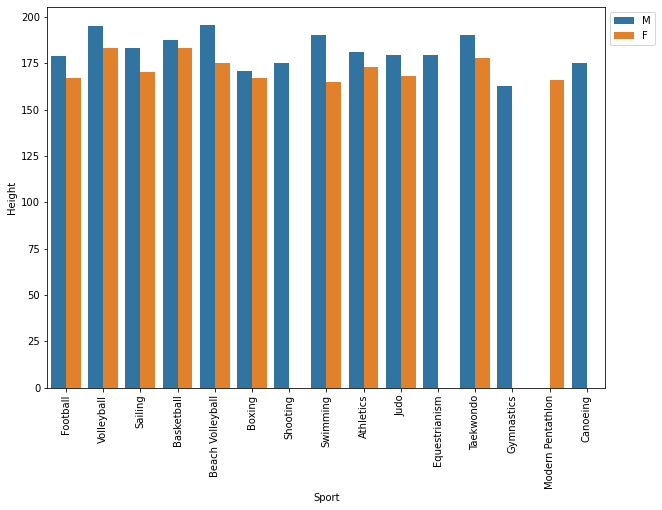

In [3]:
#sns.set_style('white')
#plt.figure(figsize=(10, 7))
#plt.legend(bbox_to_anchor=(1, 1.0))
#plt.xlabel('Average Price U$')

plt.figure(figsize=(10, 7))
sns.barplot(x='Sport', y='Height', data=bra_medals, hue='Sex', ci=None)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.xticks(rotation=90)
plt.show()

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

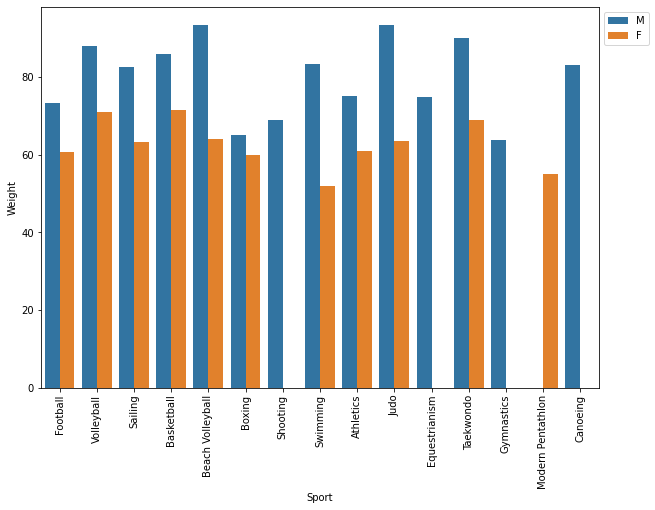

In [4]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Sport', y='Weight', data=bra_medals, hue='Sex', ci=None)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.xticks(rotation=90)
plt.show()

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [5]:

# tentativa por get dummies está com erro 
#Desconsiderar
bra_medals.to_csv('bra_medals.csv', index=None)
pd.get_dummies(bra_medals.Medal)

medalhas=pd.get_dummies(bra_medals.Medal)
medalhas['Medals'] = medalhas['Gold'] + medalhas['Silver'] + medalhas['Bronze']

frames =[bra_medals,medalhas]

bra_medals2= pd.concat(frames,axis=1)
bra_medals2.head(5)

#bra_med_2 = bra_medals2.groupby(by=['Name','Gold','Silver','Bronze']).Medals.size()
#bra_top10_2 = bra_med_2.sort_values('Medals', ascending=False)

#bra_medals2.head(5)
#bra_medals_nd2 =bra_medals2.drop_duplicates(subset=['Event','Year'], keep='first')
#bra_medals_nd2.head(3)

ID                                 Name Sex   Age  Height  Weight  \
1651   918                  Ademir Roque Kaefer   M  24.0   179.0    74.0   
1652   918                  Ademir Roque Kaefer   M  28.0   179.0    74.0   
1668   925  Adenzia Aparecida Ferreira da Silva   F  25.0   187.0    65.0   
1733   966                         Daniel Adler   M  26.0   180.0    72.0   
1856  1020         Adriana Aparecida dos Santos   F  25.0   180.0    61.0   

        Team  NOC        Games  Year  Season         City       Sport  \
1651  Brazil  BRA  1984 Summer  1984  Summer  Los Angeles    Football   
1652  Brazil  BRA  1988 Summer  1988  Summer        Seoul    Football   
1668  Brazil  BRA  2012 Summer  2012  Summer       London  Volleyball   
1733  Brazil  BRA  1984 Summer  1984  Summer  Los Angeles     Sailing   
1856  Brazil  BRA  1996 Summer  1996  Summer      Atlanta  Basketball   

                                    Event   Medal  Bronze  Gold  Silver  \
1651              Football Men's Football  Silver       0     0       1   
1652              Football Men's Football  Silver       0     0       1   
1668        Volleyball Women's Volleyball    Gold       0     1       0   
1733  Sailing Mixed Three Person Keelboat  Silver       0     0       1   
1856        Basketball Women's Basketball  Silver       0     0       1   

      Medals  
1651       1  
1652       1  
1668       1  
1733       1  
1856       1

In [6]:
bra_medals.head(5)
bra_sport_medal = bra_medals.groupby(by=['Name','Medal']).Medal.size().unstack(level=1,fill_value=0)
bra_sport_medal['Total']= bra_sport_medal['Gold'] + bra_sport_medal['Silver'] + bra_sport_medal['Bronze']
bra_athl_medal = bra_sport_medal.sort_values('Total', ascending=False)
bra_top10 = bra_athl_medal.head(10)
bra_top10 =bra_top10.reset_index() 
bra_top10.reset_index()
bra_top10.columns.name = None
bra_top10

Name  Bronze  Gold  Silver  Total
0                         Robert Scheidt       1     2       2      5
1                   Torben Schmidt Grael       2     2       1      5
2                   Gustavo Frana Borges       2     0       2      4
3     Srgio "Escadinha" Dutra dos Santos       0     2       2      4
4              Rodrigo "Rodrigo" Santana       0     1       2      3
5  Gilberto Amauri "Giba" de Godoy Filho       0     1       2      3
6      Bruno "Bruninho" Mossa de Rezende       0     1       2      3
7                Rodrigo de Paula Pessoa       2     1       0      3
8        Emanuel Fernando Scheffler Rego       1     1       1      3
9        Dante Guimares Santos do Amaral       0     1       2      3

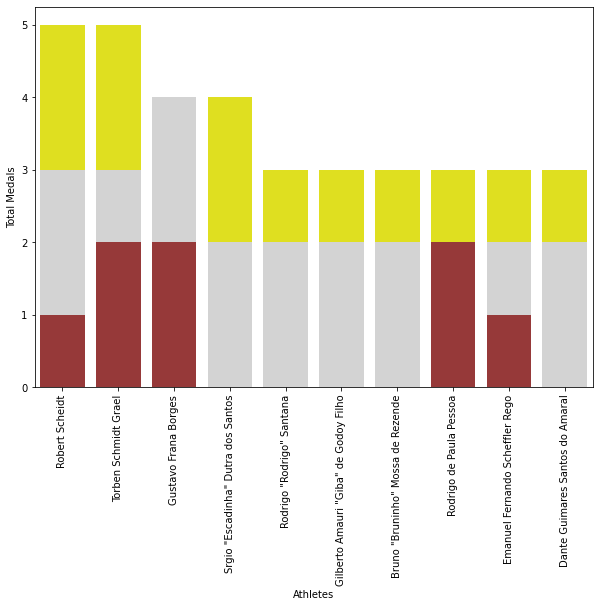

In [7]:
plt.figure(figsize=(10, 7))
#plt.legend(bbox_to_anchor=(1, 1.0))


#bar1 = sns.barplot(x='Name', y='Gold', data=bra_top10, ci=None)
#bar2 = sns.barplot(x='Name', y='Silver', data=bra_top10, ci=None)
#bar3 = sns.barplot(x='Name', y='Bronze', data=bra_top10, ci=None)


bra_top10['Total'] - bra_top10['Gold']
bar1 = sns.barplot(x = 'Name', y = 'Total',   data = bra_top10, color = 'yellow' )
bar2 = sns.barplot(x = 'Name', y = (bra_top10['Total'] - bra_top10['Gold']), data = bra_top10, color = 'lightgray')
bar3 = sns.barplot(x = 'Name', y = 'Bronze',  data = bra_top10, color = 'brown')
bar1.set(xlabel='Athletes', ylabel='Total Medals')



plt.xticks(rotation=90)
plt.show()

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [8]:
bra_medals_nd =bra_medals.drop_duplicates(subset=['Event','Year'], keep='first')
bra_medals_nd_sport= bra_medals_nd.groupby(by=['Sport','Medal'])['Medal'].size().unstack('Medal',fill_value=0)
bra_medals_nd_sport['Total']= bra_medals_nd_sport['Gold'] + bra_medals_nd_sport['Silver'] + bra_medals_nd_sport['Bronze']
bra_4 = bra_medals_nd_sport.sort_values('Total', ascending=False)
bra_4.reset_index()
bra_4.columns.name = None
bra_4 =bra_4.reset_index()
bra_4

Sport  Bronze  Gold  Silver  Total
0                Judo      15     4       3     22
1             Sailing       8     7       3     18
2           Athletics       8     5       3     16
3            Swimming       9     1       4     14
4    Beach Volleyball       2     2       6     10
5          Volleyball       2     5       3     10
6            Football       2     1       5      8
7          Basketball       4     0       1      5
8              Boxing       3     1       1      5
9            Shooting       1     1       2      4
10           Canoeing       1     0       2      3
11      Equestrianism       2     1       0      3
12         Gymnastics       0     1       2      3
13          Taekwondo       2     0       0      2
14  Modern Pentathlon       1     0       0      1

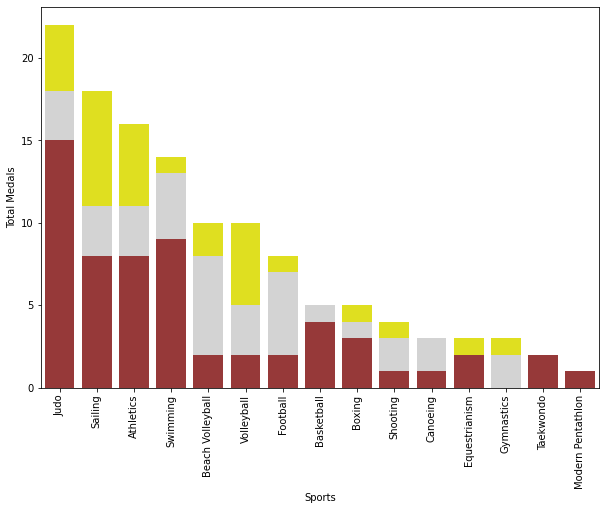

In [9]:
plt.figure(figsize=(10, 7))
bar12 = sns.barplot(x = 'Sport', y = 'Total',   data = bra_4, color = 'yellow' )
bar22 = sns.barplot(x = 'Sport', y = (bra_4['Total'] - bra_4['Gold']), data = bra_4, color = 'lightgray')
bar32 = sns.barplot(x = 'Sport', y = 'Bronze',  data = bra_4, color = 'brown')
bar12.set(xlabel='Sports', ylabel='Total Medals')

plt.xticks(rotation=90)
plt.show()

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [10]:
bra_medals_nd_event= bra_medals_nd.groupby(by=['Event','Medal'])['Medal'].size().unstack('Medal',fill_value=0)
bra_medals_nd_event['Total']= bra_medals_nd_event['Gold'] + bra_medals_nd_event['Silver'] + bra_medals_nd_event['Bronze']
bra_5 = bra_medals_nd_event.sort_values('Total', ascending=False)
bra_5.reset_index()
bra_5.columns.name = None
bra_5 =bra_5.reset_index()
bra_5

Event  Bronze  Gold  Silver  Total
0                 Volleyball Men's Volleyball       0     3       3      6
1                     Football Men's Football       2     1       3      6
2                 Athletics Men's Triple Jump       3     2       1      6
3     Beach Volleyball Men's Beach Volleyball       1     2       2      5
4   Beach Volleyball Women's Beach Volleyball       1     0       4      5
..                                        ...     ...   ...     ...    ...
57    Equestrianism Mixed Jumping, Individual       0     1       0      1
58             Judo Women's Extra-Lightweight       0     1       0      1
59                 Athletics Men's Pole Vault       0     1       0      1
60            Gymnastics Men's Floor Exercise       0     0       1      1
61                 Athletics Men's 200 metres       1     0       0      1

[62 rows x 5 columns]

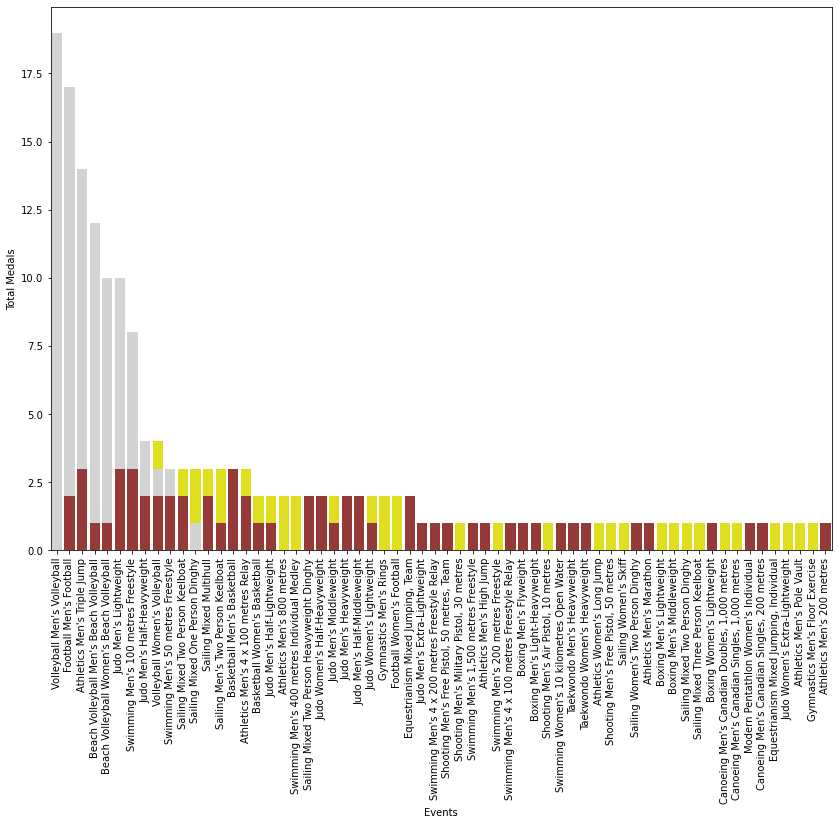

In [11]:
plt.figure(figsize=(14, 10))
bar12 = sns.barplot(x = 'Event', y = 'Total',   data = bra_5, color = 'yellow' )
bar22 = sns.barplot(x = 'Event', y = (bra_4['Total'] - bra_5['Gold']), data = bra_5, color = 'lightgray')
bar32 = sns.barplot(x = 'Event', y = 'Bronze',  data = bra_5, color = 'brown')
bar12.set(xlabel='Events', ylabel='Total Medals')
plt.xticks(rotation=90)
plt.show()

Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [12]:
bra_6 = bra_4.drop(labels=['Bronze', 'Silver','Gold'], axis=1)
bra_6
#bra_6 = bra_medals_nd.groupby(by=['Sport','Medal']).Medal.size()
#bra_6.reset_index(name='Counts')

Sport  Total
0                Judo     22
1             Sailing     18
2           Athletics     16
3            Swimming     14
4    Beach Volleyball     10
5          Volleyball     10
6            Football      8
7          Basketball      5
8              Boxing      5
9            Shooting      4
10           Canoeing      3
11      Equestrianism      3
12         Gymnastics      3
13          Taekwondo      2
14  Modern Pentathlon      1

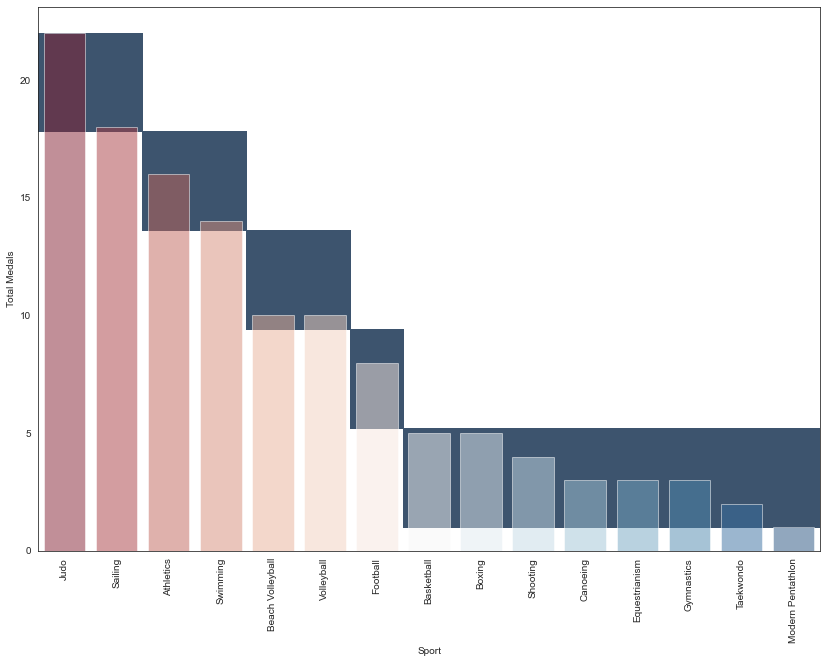

In [13]:
# Histograma não se encaixa na pergunta, plotei os dois por via das duvidas.
plt.figure(figsize=(14, 10))
sns.set_style('white')
hist2 =sns.histplot(x='Sport',y='Total', data=bra_6 )
hist2 = sns.barplot(x = 'Sport', y = 'Total',   data = bra_6, palette = "RdBu", alpha=0.5)
hist2.set(xlabel='Sport', ylabel='Total Medals')
plt.xticks(rotation=90)
plt.show()

Repita o procedimento acima, mas com medalhas de ouro.

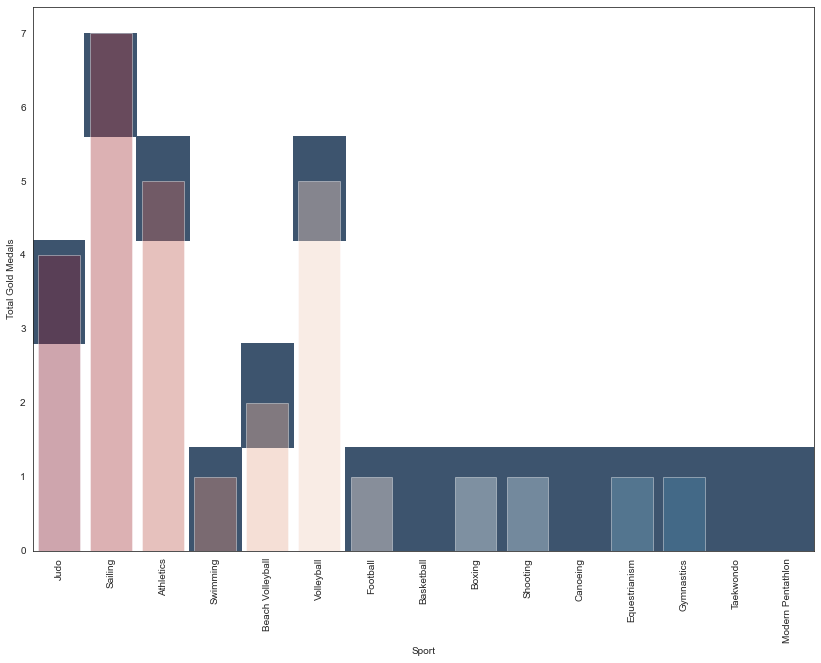

In [14]:
bra_7 = bra_4.drop(labels=['Total', 'Silver','Bronze'], axis=1)
bra_7
plt.figure(figsize=(14, 10))
sns.set_style('white')
hist3 =sns.histplot(x='Sport',y='Gold', data=bra_7 )
hist3 = sns.barplot(x = 'Sport', y = 'Gold',   data = bra_7, palette = "RdBu", alpha=0.4)
hist3.set(xlabel='Sport', ylabel='Total Gold Medals')
plt.xticks(rotation=90)
plt.show()

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

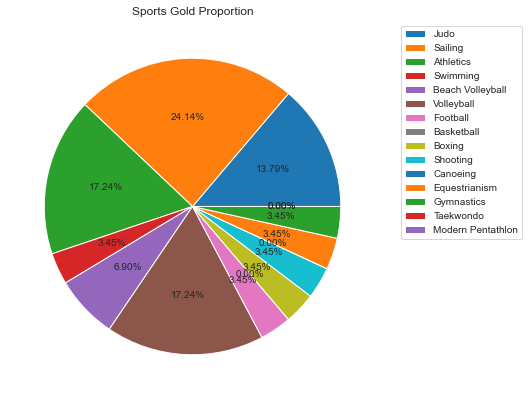

In [15]:
bra_4
plt.figure(figsize=(13, 15))
plt.subplot(211)
plt.pie(bra_4.Gold,autopct='%.2f%%')
plt.legend(bra_4.Sport, bbox_to_anchor=(1.05, 1))
plt.title('Sports Gold Proportion')
plt.show()

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [16]:
bra_medals.head(5)
bra_year = bra_medals.groupby(by=['Year','Medal']).Medal.size().unstack(level=1,fill_value=0)
bra_year['Total']= bra_year['Gold'] + bra_year['Silver'] + bra_year['Bronze']
bra_year_sort = bra_year.sort_values('Year', ascending=False)
bra_year_sort =bra_year_sort.reset_index() 
bra_year_sort.reset_index()
bra_year_sort.columns.name = None
bra_year_sort = bra_year_sort.sort_values('Year', ascending=True)
bra_year_sort

Year  Bronze  Gold  Silver  Total
18  1920       5     1       1      7
17  1948      10     0       0     10
16  1952       2     1       0      3
15  1956       0     1       0      1
14  1960      13     0       0     13
13  1964      12     0       0     12
12  1968       3     0       1      4
11  1972       2     0       0      2
10  1976       3     0       0      3
9   1980       5     4       0      9
8   1984       2     1      33     36
7   1988       5     1      17     23
6   1992       0    13       1     14
5   1996      43     5      15     63
4   2000      36     0      12     48
3   2004       3    18      19     40
2   2008      30    14      34     78
1   2012      11    14      34     59
0   2016       6    36       8     50

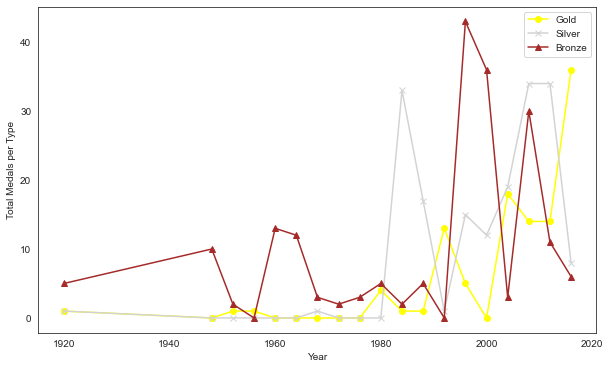

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(bra_year_sort['Year'],bra_year_sort['Gold'],marker='o',color = 'yellow' )
plt.plot(bra_year_sort['Year'],bra_year_sort['Silver'],marker='x',color = 'lightgray' )
plt.plot(bra_year_sort['Year'],bra_year_sort['Bronze'],marker='^' ,color = 'brown')

plt.xlabel('Year')
plt.ylabel('Total Medals per Type')
plt.legend(['Gold', 'Silver','Bronze'])
plt.show()



## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



In [37]:
athlete_events
world_summer = athlete_events[athlete_events['Season']== "Summer"]
world_summer
world_summer_medals = world_summer[world_summer["Medal"].notnull()]
world_summer_medals.head(5)
wsm_athl = world_summer_medals.groupby('Name')['Medal'].size().sort_values(ascending=False)
wsm_athl = wsm_athl.reset_index(level=0)
wsm_athl



Name  Medal
0                 Michael Fred Phelps, II     28
1      Larysa Semenivna Latynina (Diriy-)     18
2            Nikolay Yefimovich Andrianov     15
3                             Takashi Ono     13
4             Borys Anfiyanovych Shakhlin     13
...                                   ...    ...
24540                    Hrachya Petikyan      1
24541                   Hrachik Javakhyan      1
24542              Howe Liang "Tiger" Tan      1
24543        Howard Thayer Kingsbury, Jr.      1
24544        ver Maximiliano David Banega      1

[24545 rows x 2 columns]

Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

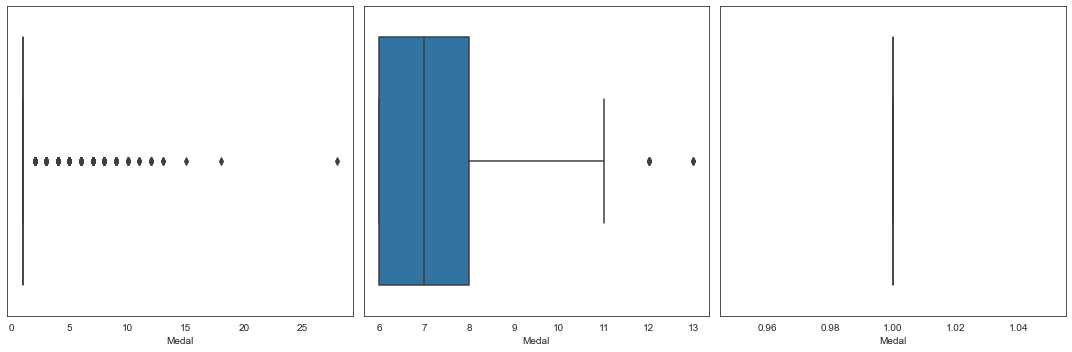

In [38]:
wsm_athl_2 = wsm_athl[(wsm_athl['Medal'] > 5 )& (wsm_athl['Medal'] < 14 )]
wsm_athl_2
fig, axes =plt.subplots(1,3, figsize=(15,5))

sns.boxplot(data=wsm_athl, x='Medal',showfliers=True, ax=axes[0])
sns.boxplot(data=wsm_athl_2, x='Medal',showfliers=True, ax=axes[1])
# O terceiro é considerando apenas o showfliers = FALSE
sns.boxplot(data=wsm_athl, x='Medal',showfliers=False, ax=axes[2])
plt.tight_layout()
plt.show()

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

In [20]:
world_summer_medals.head(5)
world_summer_medals_nd =world_summer_medals.drop_duplicates(subset=['Event','Year'], keep='first')
wsm_gold = world_summer_medals_nd[world_summer_medals_nd['Medal']=='Gold']
wsm_gold_g = wsm_gold.groupby(by=['NOC'])['Medal'].value_counts()
wsm_gold_g = wsm_gold_g.sort_values(ascending=False).reset_index(name='TotalGold')
wsm_gold_top10 =wsm_gold_g.head(10)
wsm_gold_under10 = wsm_gold_g[wsm_gold_g['TotalGold']<48]
wsm_gold_under10.TotalGold.sum()
wsm_gold_under10
wsm_gold_top11 =wsm_gold_top10.append({'NOC': 'Others', 'Medal':'Gold', 'TotalGold':(wsm_gold_under10.TotalGold.sum()) },ignore_index=True)
wsm_gold_top11=wsm_gold_top11.sort_values('TotalGold',ascending=False)
wsm_gold_top11

NOC Medal  TotalGold
10  Others  Gold        660
0      USA  Gold        376
1      URS  Gold        124
2      FRA  Gold        100
3      ITA  Gold         90
4      GBR  Gold         90
5      GER  Gold         78
6      HUN  Gold         54
7      SWE  Gold         52
8      CHN  Gold         51
9      AUS  Gold         48

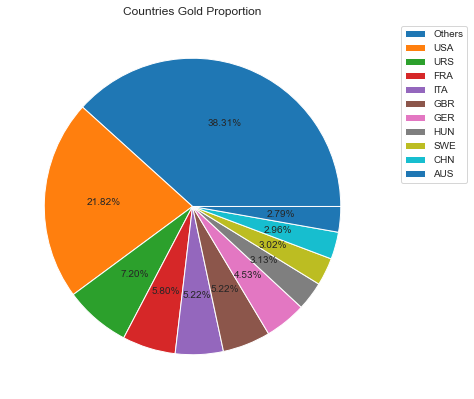

In [21]:
plt.figure(figsize=(13, 15))
plt.subplot(211)
plt.pie(wsm_gold_top11.TotalGold,autopct='%.2f%%')
plt.legend(wsm_gold_top11.NOC, bbox_to_anchor=(1.05, 1))
plt.title('Countries Gold Proportion')
plt.show()

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

In [22]:
world_summer_medals.head(5)
world_summer_medals_nd =world_summer_medals.drop_duplicates(subset=['Event','Year'], keep='first')
wsm = world_summer_medals_nd.groupby(by=['NOC'])['Medal'].size()
wsm
wsm_g = wsm.sort_values(ascending=False).reset_index(name='Total')
wsm_g
wsm_top10 =wsm_g.head(10)
wsm_top10
wsm_under10 = wsm_g[wsm_g['Total']<125]
wsm_under10
soma = wsm_under10.Total.sum()
wsm_top11 =wsm_top10.append({'NOC': 'Others',  'Total':(wsm_under10.Total.sum()) },ignore_index=True)
wsm_top11=wsm_top11.sort_values('Total',ascending=False)
wsm_top11

NOC  Total
10  Others   2094
0      USA    892
1      URS    318
2      GBR    315
3      FRA    311
4      GER    258
5      ITA    244
6      SWE    196
7      HUN    160
8      RUS    153
9      AUS    150

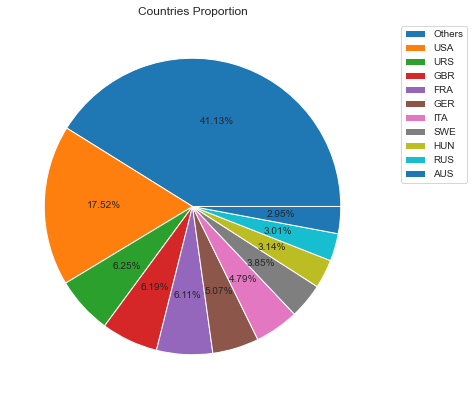

In [23]:
plt.figure(figsize=(13, 15))
plt.subplot(211)
plt.pie(wsm_top11.Total,autopct='%.2f%%')
plt.legend(wsm_top11.NOC, bbox_to_anchor=(1.05, 1))
plt.title('Countries Proportion')
plt.show()

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

In [24]:
world_summer_medals.head(5)
world_summer_medals_nd =world_summer_medals.drop_duplicates(subset=['Event','Year'], keep='first')
world_tot = world_summer_medals_nd.groupby(by=['NOC','Medal']).Medal.size().unstack(level=1,fill_value=0)
world_tot
world_tot['Total']= world_tot['Gold'] + world_tot['Silver'] + world_tot['Bronze']
world_tot
world_tot = world_tot.sort_values('Total', ascending=False)
world_tot =world_tot.reset_index() 
world_tot.reset_index()
world_tot.columns.name = None
world_tot10 =world_tot.head(10)

world_under10 = world_tot[world_tot['Total']<=125]
world_under10

world_tot11 =world_tot10.append({'NOC': 'Others',
                                 'Total':(world_under10.Total.sum()),
                                 'Bronze':(world_under10.Bronze.sum()),
                                 'Gold':(world_under10.Gold.sum()),
                                 'Silver':(world_under10.Silver.sum()) },ignore_index=True)
world_tot11=world_tot11.sort_values('Total',ascending=False)
world_tot11


NOC  Bronze  Gold  Silver  Total
10  Others     830   666     723   2219
0      USA     247   376     269    892
1      URS      87   124     107    318
2      GBR     108    90     117    315
3      FRA     118   100      93    311
4      GER      88    78      92    258
5      ITA      82    90      72    244
6      SWE      70    52      74    196
7      HUN      55    54      51    160
8      RUS      63    45      45    153
9      AUS      59    48      43    150

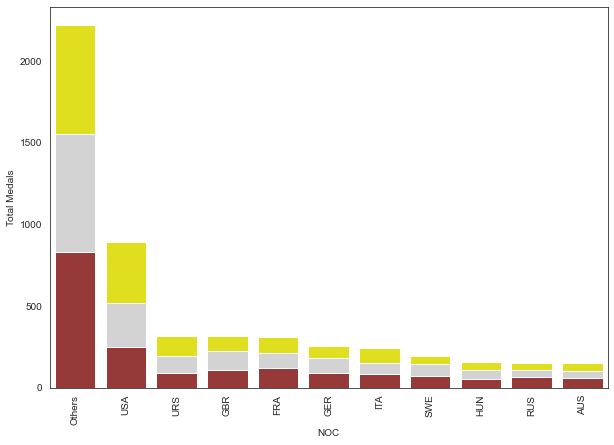

In [25]:
plt.figure(figsize=(10, 7))
bar4 = sns.barplot(x = 'NOC', y = 'Total',   data = world_tot11, color = 'yellow' )
bar5 = sns.barplot(x = 'NOC', y = (world_tot11['Total'] - world_tot11['Gold']), data = world_tot11, color = 'lightgray')
bar6 = sns.barplot(x = 'NOC', y = 'Bronze',  data = world_tot11, color = 'brown')
bar4.set(xlabel='NOC', ylabel='Total Medals')

plt.xticks(rotation=90)
plt.show()

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

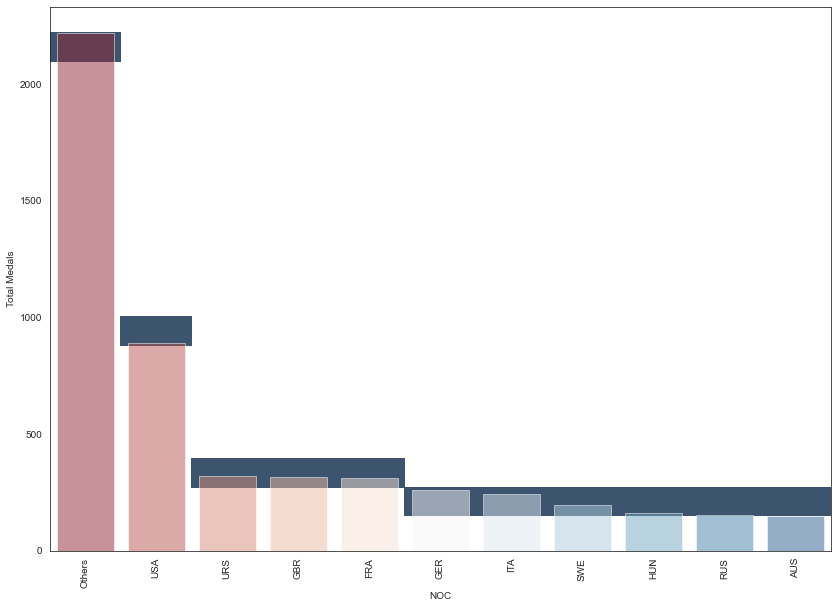

In [26]:
#Histograma não é uma boa representação com um dataframe que possua o total geral de medalhas por país.Não existe uma 
#frequencia de distribuição para ser avaliada.

plt.figure(figsize=(14, 10))
sns.set_style('white')
hist5 =sns.histplot(x='NOC',y='Total', data=world_tot11 )

hist5 = sns.barplot(x = 'NOC', y = 'Total',   data = world_tot11, palette = "RdBu", alpha=0.5)
hist5.set(xlabel='NOC', ylabel='Total Medals')
plt.xticks(rotation=90)
plt.show()

In [27]:
'''Nesse exemplo o conseguimos utilizar o histograma para ver quantas vezes um determinado total de medalhas apareceu durante os anos
'''
world_summer_medals.head(5)
world_summer_medals_nd =world_summer_medals.drop_duplicates(subset=['Event','Year'], keep='first')
world_t = world_summer_medals_nd.groupby(by=['NOC','Year','Medal']).Medal.size().unstack(level=2,fill_value=0)
world_t
world_t['Total']= world_t['Gold'] + world_t['Silver'] + world_t['Bronze']
world_t

world_t =world_t.reset_index() 
world_t.reset_index()
world_t.columns.name = None
world_t = world_t.sort_values('Total', ascending=False)
world_t10 =world_t[(world_t['NOC']=='USA') |
                   (world_t['NOC']=='URS') | 
                   (world_t['NOC']=='GBR') | 
                   (world_t['NOC']=='FRA') | 
                   (world_t['NOC']=='GER') |
                  (world_t['NOC']=='ITA') |
                  (world_t['NOC']=='SWE')|
                  (world_t['NOC']=='HUN')|
                  (world_t['NOC']=='RUS')|
                  (world_t['NOC']=='AUS')]
world_t10




NOC  Year  Bronze  Gold  Silver  Total
889  USA  1904      20    27      28     75
881  URS  1980      16    24      27     67
906  USA  1984       9    33      20     62
914  USA  2016      21    23      11     55
908  USA  1992      14    19      16     49
..   ...   ...     ...   ...     ...    ...
303  FRA  1976       1     0       0      1
321  GBR  1904       0     0       1      1
358  GER  1900       1     0       0      1
398  HUN  1906       0     0       1      1
397  HUN  1900       0     1       0      1

[221 rows x 6 columns]

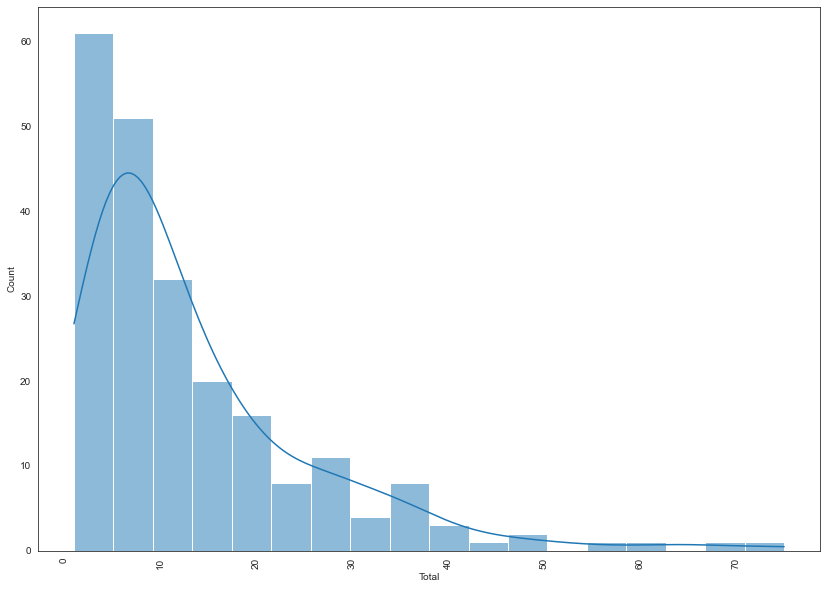

In [28]:
plt.figure(figsize=(14, 10))
sns.set_style('white')
hist6 =sns.histplot(x='Total', data=world_t10, kde=True )
plt.xticks(rotation=90)
plt.show()

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

In [29]:
world_tot10

NOC  Bronze  Gold  Silver  Total
0  USA     247   376     269    892
1  URS      87   124     107    318
2  GBR     108    90     117    315
3  FRA     118   100      93    311
4  GER      88    78      92    258
5  ITA      82    90      72    244
6  SWE      70    52      74    196
7  HUN      55    54      51    160
8  RUS      63    45      45    153
9  AUS      59    48      43    150

In [30]:
!pip install cufflinks
!pip install chart_studio
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

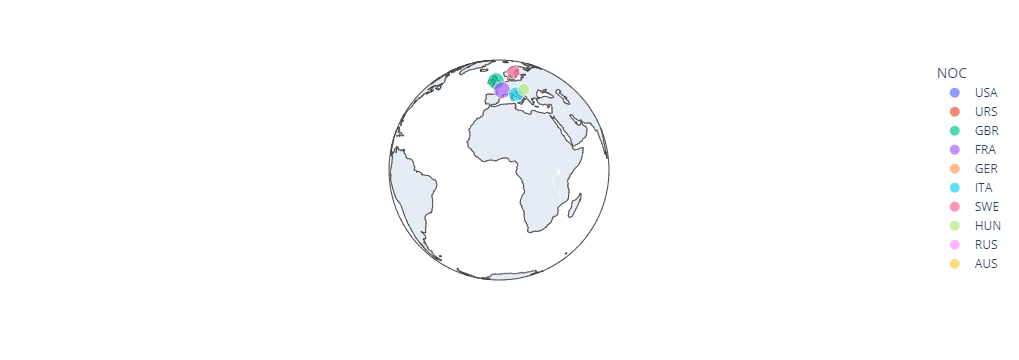

In [31]:

px.scatter_geo(world_tot10, locations='NOC',
              color='NOC',
               hover_name='NOC',
               size='Total',
              projection='orthographic')


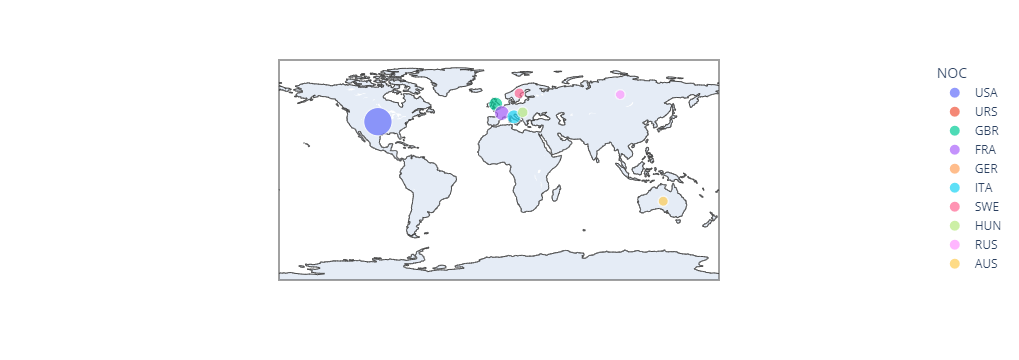

In [39]:

px.scatter_geo(world_tot10, locations='NOC',
              color='NOC',
               hover_name='NOC',
               size='Gold',
              )


## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

In [33]:
world_summer_medals
w_sm = world_summer_medals.groupby(by=['Name','Sport','NOC','Medal'])['Medal'].size().unstack('Medal',fill_value=0)
w_sm['Total']= w_sm['Gold'] + w_sm['Silver'] + w_sm['Bronze']
w_sm = w_sm.sort_values('Total', ascending=False)
w_sm.reset_index()
w_sm.columns.name = None
w_sm =w_sm.reset_index()
w_sm
w_sm2 = w_sm.sort_values('Total', ascending=False)
w_sm2
w_sm3 =w_sm2.drop_duplicates(subset=['Sport'], keep='first')
w20 =w_sm3[(w_sm3['Sport']=='Sailing')|
          (w_sm3['Sport']=='Swimming')|
          (w_sm3['Sport']=='Volleyball')|
          (w_sm3['Sport']=='Beach Volleyball')|
          (w_sm3['Sport']=='Canoeing')|
          (w_sm3['Sport']=='Equestrianism')|
          (w_sm3['Sport']=='Basketball')|
          (w_sm3['Sport']=='Athletics')|
          (w_sm3['Sport']=='Shooting')|
          (w_sm3['Sport']=='Football')|
          (w_sm3['Sport']=='Gymnastics')|
          (w_sm3['Sport']=='Judo')|
          (w_sm3['Sport']=='Boxing')|
          (w_sm3['Sport']=='Taekwondo')|
          (w_sm3['Sport']=='Modern Pentathlon')]


w20=w20.reindex([317,0,648,394,65,27,293,6,17,679,1,333,1359,1341,76])
w20.head(5)

Name             Sport  NOC  Bronze  Gold  \
317                      Robert Scheidt           Sailing  BRA       1     2   
0               Michael Fred Phelps, II          Swimming  USA       2    23   
648  Srgio "Escadinha" Dutra dos Santos        Volleyball  BRA       0     2   
394            Kerri Lee Walsh Jennings  Beach Volleyball  USA       1     3   
65                        Katalin Kovcs          Canoeing  HUN       0     3   

     Silver  Total  
317       2      5  
0         3     28  
648       2      4  
394       0      4  
65        5      8

In [34]:
bra_medals
w_sm4 = bra_medals.groupby(by=['Name','Sport','NOC','Medal'])['Medal'].size().unstack('Medal',fill_value=0)
w_sm4['Total']= w_sm4['Gold'] + w_sm4['Silver'] + w_sm4['Bronze']
w_sm4 = w_sm4.sort_values('Total', ascending=False)
w_sm4.reset_index()
w_sm4.columns.name = None
w_sm4 =w_sm4.reset_index()
w_sm4
w_sm5 = w_sm4.sort_values('Total', ascending=False)
w_sm5
w_sm6 =w_sm5.drop_duplicates(subset=['Sport'], keep='first')
w20_bra=w_sm6.head(20)
w20_bra
w20_bra.head(5)

Name             Sport  NOC  Bronze  Gold  \
0                       Robert Scheidt           Sailing  BRA       1     2   
2                 Gustavo Frana Borges          Swimming  BRA       2     0   
3   Srgio "Escadinha" Dutra dos Santos        Volleyball  BRA       0     2   
14           Ricardo Alex Costa Santos  Beach Volleyball  BRA       1     1   
11         Isaquias Queiroz dos Santos          Canoeing  BRA       1     0   

    Silver  Total  
0        2      5  
2        2      4  
3        2      4  
14       1      3  
11       2      3

In [77]:
w20_bra_world = w20.append(w20_bra, ignore_index=True)
w20_bra_world

Name              Sport  NOC  Bronze  \
0                         Robert Scheidt            Sailing  BRA       1   
1                Michael Fred Phelps, II           Swimming  USA       2   
2     Srgio "Escadinha" Dutra dos Santos         Volleyball  BRA       0   
3               Kerri Lee Walsh Jennings   Beach Volleyball  USA       1   
4                          Katalin Kovcs           Canoeing  HUN       0   
5                  Isabelle Regina Werth      Equestrianism  GER       0   
6                         Teresa Edwards         Basketball  USA       1   
7                   Paavo Johannes Nurmi          Athletics  FIN       0   
8                   Carl Townsend Osburn           Shooting  USA       2   
9       Christie Patricia Pearce-Rampone           Football  USA       0   
10    Larysa Semenivna Latynina (Diriy-)         Gymnastics  URS       4   
11                     Ryoko Tamura-Tani               Judo  JPN       1   
12                    Roberto Cammarelle             Boxing  ITA       1   
13                  Hadi Saei Bonehkohal          Taekwondo  IRI       1   
14            Pavel Serafimovich Lednyov  Modern Pentathlon  URS       3   
15                        Robert Scheidt            Sailing  BRA       1   
16                  Gustavo Frana Borges           Swimming  BRA       2   
17    Srgio "Escadinha" Dutra dos Santos         Volleyball  BRA       0   
18             Ricardo Alex Costa Santos   Beach Volleyball  BRA       1   
19           Isaquias Queiroz dos Santos           Canoeing  BRA       1   
20               Rodrigo de Paula Pessoa      Equestrianism  BRA       2   
21             Zenny "Algodo" de Azevedo         Basketball  BRA       2   
22                Andr Domingos da Silva          Athletics  BRA       1   
23                Afrnio Antnio da Costa           Shooting  BRA       1   
24         Marcelo Vieira da Silva Jnior           Football  BRA       1   
25              Arthur Nabarrete Zanetti         Gymnastics  BRA       0   
26     Tiago Henrique de Oliveira Camilo               Judo  BRA       1   
27              Adriana dos Santos Arajo             Boxing  BRA       1   
28                Natlia Falavigna Silva          Taekwondo  BRA       1   
29  Yane Mrcia Campos da Fonseca Marques  Modern Pentathlon  BRA       1   

    Gold  Silver  Total  
0      2       2      5  
1     23       3     28  
2      2       2      4  
3      3       0      4  
4      3       5      8  
5      6       4     10  
6      4       0      5  
7      9       3     12  
8      5       4     11  
9      3       1      4  
10     9       5     18  
11     2       2      5  
12     1       1      3  
13     2       0      3  
14     2       2      7  
15     2       2      5  
16     0       2      4  
17     2       2      4  
18     1       1      3  
19     0       2      3  
20     1       0      3  
21     0       0      2  
22     0       1      2  
23     0       1      2  
24     0       1      2  
25     1       1      2  
26     0       1      2  
27     0       0      1  
28     0       0      1  
29     0       0      1

No handles with labels found to put in legend.


<Figure size 1440x1080 with 0 Axes>

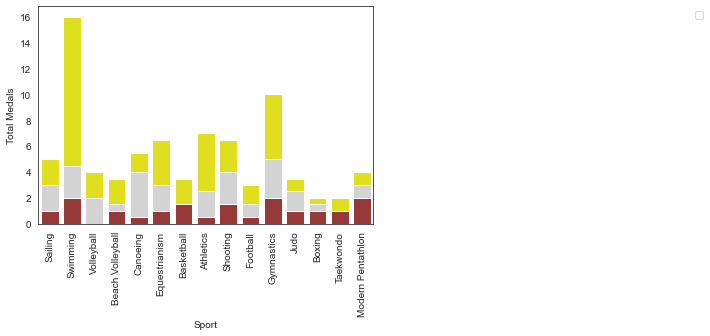

In [78]:
#Essa tá difícil de fazer viu!
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
bar7 = sns.barplot(x = 'Sport', y = 'Total',   data = w20_bra_world, color = 'yellow', ci=None, )
bar8 = sns.barplot(x = 'Sport', y = (w20_bra_world['Total'] - w20_bra_world['Gold']), data = w20_bra_world, color = 'lightgray', ci=None )
bar9 = sns.barplot(x = 'Sport', y = 'Bronze',  data = w20_bra_world, color = 'brown', ci=None )
bar7.set(xlabel='Sport', ylabel='Total Medals')
plt.legend(bbox_to_anchor=(2, 1.0))
plt.xticks(rotation=90)
plt.show()

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.

In [95]:
world_summer_medals.head(5)
world_summer_medals_nd =world_summer_medals.drop_duplicates(subset=['Event','Year'], keep='first')
world_tot = world_summer_medals_nd.groupby(by=['NOC','Medal']).Medal.size().unstack(level=1,fill_value=0)
world_tot
world_tot['Total']= world_tot['Gold'] + world_tot['Silver'] + world_tot['Bronze']
world_tot
world_tot = world_tot.sort_values('Total', ascending=False)
world_tot =world_tot.reset_index() 
world_tot.reset_index()
world_tot.columns.name = None
world_tot101 =world_tot.head(10)

world_under101 = world_tot[(world_tot['Total']<=125) & (world_tot['NOC'] != 'BRA')]
world_under101

world_tot111 =world_tot101.append({'NOC': 'Others',
                                 'Total':(world_under10.Total.sum()),
                                 'Bronze':(world_under10.Bronze.sum()),
                                 'Gold':(world_under10.Gold.sum()),
                                 'Silver':(world_under10.Silver.sum()) },ignore_index=True)
world_tot111=world_tot111.sort_values('Total',ascending=False)

wbr = world_tot[world_tot['NOC']=='BRA']
world_tot111 = pd.concat([world_tot111,wbr],  axis=0)
world_tot111

NOC  Bronze  Gold  Silver  Total
10  Others     804   656     704   2164
0      USA     247   376     269    892
1      URS      87   124     107    318
2      GBR     108    90     117    315
3      FRA     118   100      93    311
4      GER      88    78      92    258
5      ITA      82    90      72    244
6      SWE      70    52      74    196
7      HUN      55    54      51    160
8      RUS      63    45      45    153
9      AUS      59    48      43    150
25     BRA      26    10      19     55

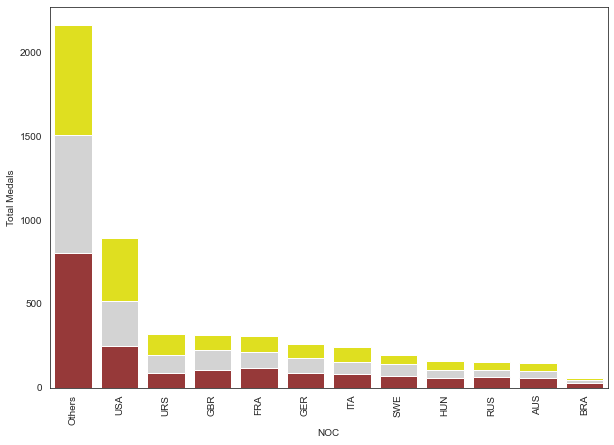

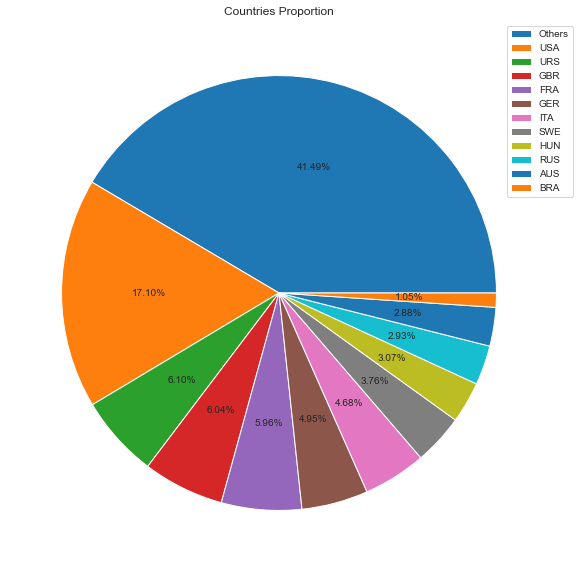

In [121]:


plt.figure(figsize=(10, 7))
bar10 = sns.barplot(x = 'NOC', y = 'Total',   data = world_tot111, color = 'yellow', )
bar11 = sns.barplot(x = 'NOC', y = (world_tot111['Total'] - world_tot111['Gold']), data = world_tot111, color = 'lightgray',)
bar12 = sns.barplot(x = 'NOC', y = 'Bronze',  data = world_tot111, color = 'brown',)
bar10.set(xlabel='NOC', ylabel='Total Medals')

plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 10))

plt.pie(world_tot111.Total,autopct='%.2f%%',)
plt.legend(world_tot111.NOC, bbox_to_anchor=(1.05, 1))
plt.title('Countries Proportion')
plt.show()